In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('cars_sampled.csv')

print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43542 entries, 0 to 43541
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dateCrawled          43542 non-null  object 
 1   name                 43542 non-null  object 
 2   seller               43542 non-null  object 
 3   offerType            43542 non-null  object 
 4   price                43542 non-null  int64  
 5   abtest               43542 non-null  object 
 6   vehicleType          39022 non-null  object 
 7   yearOfRegistration   43541 non-null  float64
 8   gearbox              41069 non-null  object 
 9   powerPS              43541 non-null  float64
 10  model                41149 non-null  object 
 11  kilometer            43541 non-null  float64
 12  monthOfRegistration  43541 non-null  float64
 13  fuelType             39608 non-null  object 
 14  brand                43541 non-null  object 
 15  notRepairedDamage    35044 non-null 

In [5]:
data.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003.0,manual,150.0,3er,150000.0,3.0,diesel,bmw,NaN,30/03/2016 0:00,20257.0,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005.0,manual,163.0,xc_reihe,150000.0,6.0,diesel,volvo,no,7/3/2016 0:00,88045.0,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003.0,manual,101.0,touran,150000.0,11.0,diesel,volkswagen,NaN,31/03/2016 0:00,27449.0,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006.0,manual,86.0,ibiza,60000.0,12.0,petrol,seat,no,19/03/2016 0:00,34537.0,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008.0,automatic,185.0,xc_reihe,150000.0,11.0,diesel,volvo,no,16/03/2016 0:00,55270.0,1/4/2016 23:18


In [6]:
date_columns = ['dateCrawled', 'dateCreated', 'lastSeen']
for col in date_columns:
    data[col] = pd.to_datetime(data[col], format='%d/%m/%Y %H:%M')

In [7]:
missing_values = data.isnull().sum()
print(missing_values)


dateCrawled               0
name                      0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            4520
yearOfRegistration        1
gearbox                2473
powerPS                   1
model                  2393
kilometer                 1
monthOfRegistration       1
fuelType               3934
brand                     1
notRepairedDamage      8498
dateCreated               1
postalCode                1
lastSeen                  1
dtype: int64


In [8]:

most_common_vehicle_type = data['vehicleType'].mode()[0]
data['vehicleType'].fillna(most_common_vehicle_type, inplace=True)

most_common_gearbox = data['gearbox'].mode()[0]
data['gearbox'].fillna(most_common_gearbox, inplace=True)

data['model'].fillna('unknown', inplace=True)

most_common_fuel_type = data['fuelType'].mode()[0]
data['fuelType'].fillna(most_common_fuel_type, inplace=True)

data['notRepairedDamage'].fillna('unknown', inplace=True)


missing_values = data.isnull().sum()
print(missing_values)

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     1
gearbox                0
powerPS                1
model                  0
kilometer              1
monthOfRegistration    1
fuelType               0
brand                  1
notRepairedDamage      0
dateCreated            1
postalCode             1
lastSeen               1
dtype: int64


In [9]:
data = data.drop(['abtest', 'offerType'], axis=1)

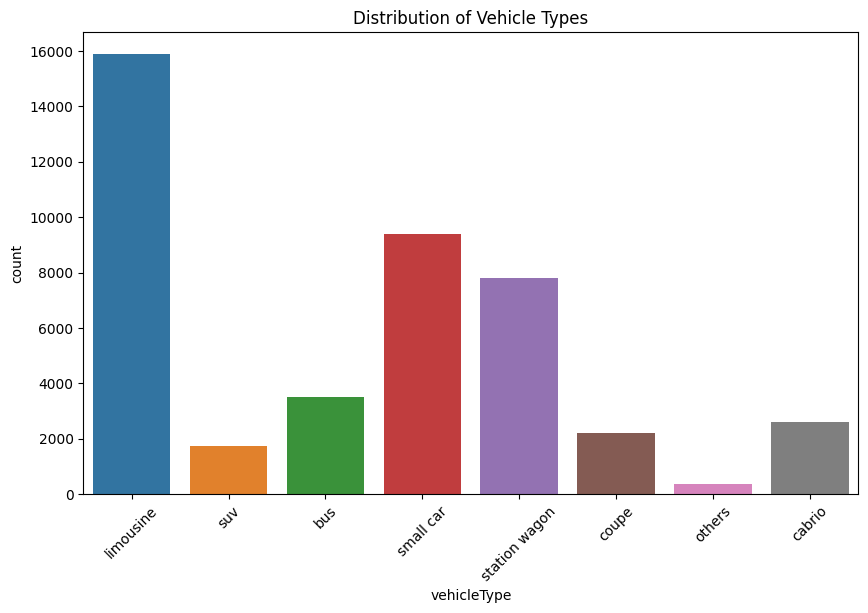

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='vehicleType')
plt.title('Distribution of Vehicle Types')
plt.xticks(rotation=45)
plt.show()


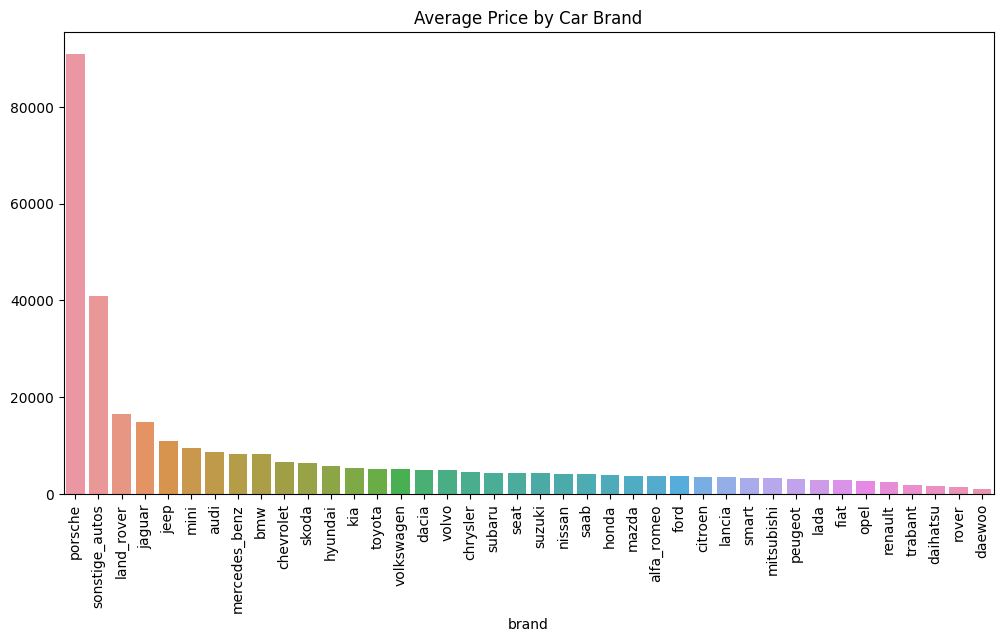

In [11]:
plt.figure(figsize=(12, 6))
brand_prices = data.groupby('brand')['price'].mean().sort_values(ascending=False)
sns.barplot(x=brand_prices.index, y=brand_prices.values)
plt.title('Average Price by Car Brand')
plt.xticks(rotation=90)
plt.show()


<ipython-input-13-d61b92461512>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


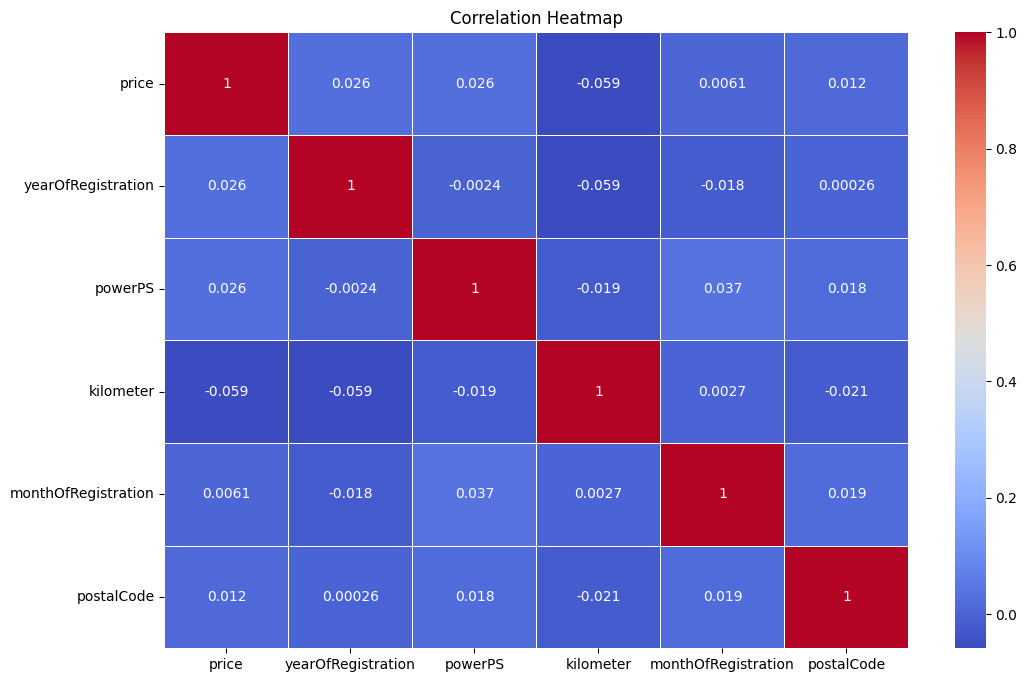

In [13]:
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

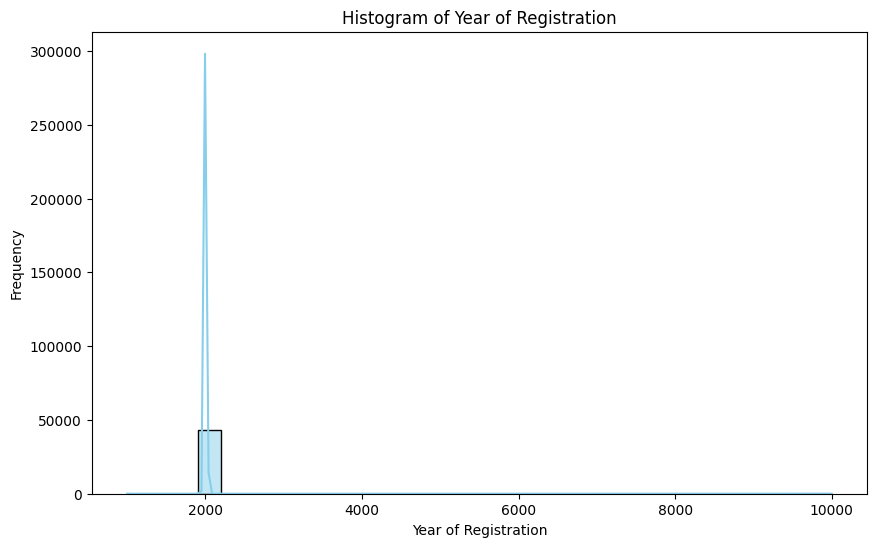

In [22]:

# Create a histogram (histplot) for the distribution of Year of Registration
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='yearOfRegistration', bins=30, kde=True, color='skyblue')
plt.title('Histogram of Year of Registration')
plt.xlabel('Year of Registration')
plt.ylabel('Frequency')
plt.show()

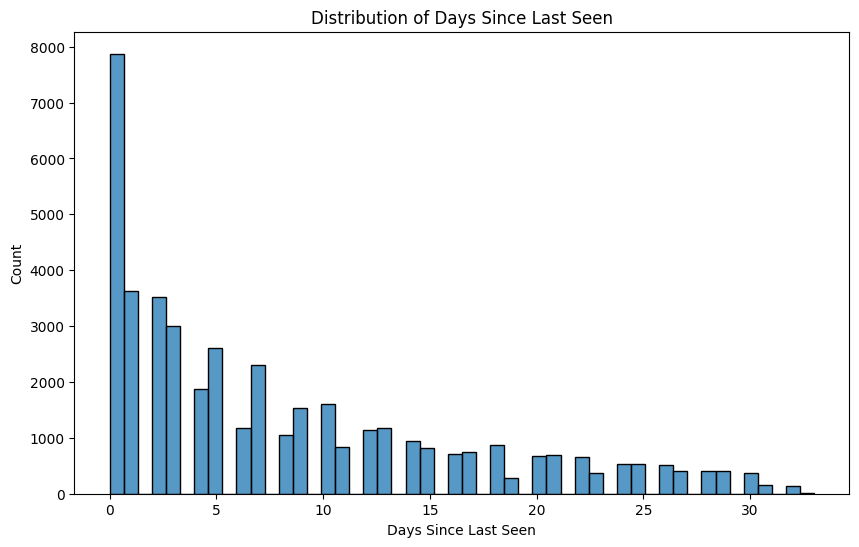

In [23]:
data['daysSinceLastSeen'] = (data['lastSeen'] - data['dateCrawled']).dt.days

# Distribution of days since last seen
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='daysSinceLastSeen', bins=50)
plt.title('Distribution of Days Since Last Seen')
plt.xlabel('Days Since Last Seen')
plt.ylabel('Count')
plt.show()